<a href="https://colab.research.google.com/github/farghea/Pose-Detection-Biomechanics/blob/main/repetative_lifting_ICON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!rm -r /content/ICON

# get the code of ICON
!git clone https://github.com/YuliangXiu/ICON.git

!pip install --upgrade --force-reinstall trimesh

rm: cannot remove '/content/ICON': No such file or directory
Cloning into 'ICON'...
remote: Enumerating objects: 2695, done.
remote: Counting objects: 100% (2695/2695), done.
remote: Compressing objects: 100% (839/839), done.
remote: Total 2695 (delta 1878), reused 2615 (delta 1830), pack-reused 0
Receiving objects: 100% (2695/2695), 155.51 MiB | 29.80 MiB/s, done.
Resolving deltas: 100% (1878/1878), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 681.6/681.6 kB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 23.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
num

In [ ]:
# - - - - Getting data for validation (start)
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# fix environment.yaml
with open(f'/content/ICON/environment.yaml', 'r+') as file:
    data = file.readlines()
    data[11] = "  - pytorch-cuda\n"
    data.append("\n  - scipy=1.7.2")  # add the new line
    file.seek(0)
    file.writelines(data)
    file.truncate()


mypath = f'/content/ICON/requirements.txt'
# Open the file in read mode
with open(mypath, 'r') as file:
    # Read the contents of the file into a list
    lines = file.readlines()

# Loop through the list and replace the matching line
for i in range(len(lines)):
    if 'open3d' in lines[i]:
        lines[i] = 'open3d==0.16.0\n'

# Open the file in write mode and write the modified contents
with open(mypath, 'w') as file:
    file.writelines(lines)


In [ ]:
# package installation (will take ~15 min, just get a coffee)
from IPython.display import clear_output
%cd /content/ICON
!bash colab.sh
# clear_output()

/content/ICON
--2023-06-24 02:14:49--  https://repo.anaconda.com/miniconda/Miniconda3-py38_4.10.3-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 103553755 (99M) [application/x-sh]
Saving to: ‘Miniconda3-py38_4.10.3-Linux-x86_64.sh’

Miniconda3-py38_4.1 100%[===================>]  98.76M   343MB/s    in 0.3s    

2023-06-24 02:14:50 (343 MB/s) - ‘Miniconda3-py38_4.10.3-Linux-x86_64.sh’ saved [103553755/103553755]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: | / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - _openmp_mutex==4.5=1_gnu
    - brotlipy==0.7.0=py38h27cfd23_1003
    - ca-certificates==2021.7.5=h06a4308_1
    - certifi==2021.5.30=py38h06a4308_0
    - cffi==1.14.6=py38h40

In [ ]:
# download models and extra data (register required)
%cd /content/ICON

# hardcode username and password into the fetch_data.sh
with open('fetch_data.sh', 'r+') as file:
    data = file.readlines()

    data[6] = "\n"
    data[7] = "\n"
    data[8] = "\n"
    # - - - - here you should enter your email and password regitered on ICON
    data[9] = "username=\"myemail@sever.com\"\n"
    data[10] = "password=\"mypassword\"\n"

    data = data[:53]  # Remove optioanl downloads at the end of the file

    file.seek(0)  # Move the pointer to the begining
    file.writelines(data)
    file.truncate()



/content/ICON


In [ ]:
!bash fetch_data.sh # input "N" to avoid downloading data used for training


--2023-06-24 02:42:42--  https://download.is.tue.mpg.de/download.php?domain=smpl&sfile=SMPL_python_v.1.0.0.zip&resume=1
Resolving download.is.tue.mpg.de (download.is.tue.mpg.de)... 192.124.27.139
Connecting to download.is.tue.mpg.de (download.is.tue.mpg.de)|192.124.27.139|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: download.php?domain=smpl&sfile=SMPL_python_v.1.0.0.zip&resume=1 [following]
--2023-06-24 02:42:43--  https://download.is.tue.mpg.de/download.php?domain=smpl&sfile=SMPL_python_v.1.0.0.zip&resume=1
Reusing existing connection to download.is.tue.mpg.de:443.
HTTP request sent, awaiting response... 200 OK
Length: 70484881 (67M) [application/octet-stream]
Saving to: ‘./data/smpl_related/models/SMPL_python_v.1.0.0.zip’

./data/smpl_related 100%[===================>]  67.22M  24.0MB/s    in 2.8s    

2023-06-24 02:42:46 (24.0 MB/s) - ‘./data/smpl_related/models/SMPL_python_v.1.0.0.zip’ saved [70484881/70484881]

Archive:  data/smpl_related/models/

In [ ]:
# download mesh_downsampling file
!mkdir -p data/HPS/pymaf_data && cd data/HPS/pymaf_data/
!pwd

/content/ICON


In [ ]:
%cd data/HPS/pymaf_data/
!wget https://github.com/nkolot/GraphCMR/raw/master/data/mesh_downsampling.npz

/content/ICON/data/HPS/pymaf_data
--2023-06-24 02:44:03--  https://github.com/nkolot/GraphCMR/raw/master/data/mesh_downsampling.npz
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/nkolot/GraphCMR/master/data/mesh_downsampling.npz [following]
--2023-06-24 02:44:03--  https://raw.githubusercontent.com/nkolot/GraphCMR/master/data/mesh_downsampling.npz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1720359 (1.6M) [application/octet-stream]
Saving to: ‘mesh_downsampling.npz’

mesh_downsampling.n 100%[===================>]   1.64M  --.-KB/s    in 0.01s   

2023-06-24 02:44:03 (138 MB/s) - ‘mesh_downs

In [ ]:
# Model constants etc from https://github.com/nkolot/SPIN/blob/master/fetch_data.sh
!wget http://visiondata.cis.upenn.edu/spin/data.tar.gz
!tar xvf data.tar.gz
!mv data/* .
!rm -rf data && rm -f data.tar.gz

--2023-06-24 02:44:03--  http://visiondata.cis.upenn.edu/spin/data.tar.gz
Resolving visiondata.cis.upenn.edu (visiondata.cis.upenn.edu)... 158.130.68.16
Connecting to visiondata.cis.upenn.edu (visiondata.cis.upenn.edu)|158.130.68.16|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14960640 (14M) [application/x-gzip]
Saving to: ‘data.tar.gz’

data.tar.gz         100%[===================>]  14.27M  50.3MB/s    in 0.3s    

2023-06-24 02:44:05 (50.3 MB/s) - ‘data.tar.gz’ saved [14960640/14960640]

data/
data/J_regressor_h36m.npy
data/cube_parts.npy
data/train.h5
data/vertex_texture.npy
data/smpl_mean_params.npz
data/J_regressor_extra.npy
data/gmm_08.pkl


In [ ]:
# PyMAF pre-trained model (gdown>=4.6.0)
!apt-get install python3-pip
!pip install --upgrade gdown


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  python-pip-whl python3-setuptools python3-wheel
Suggested packages:
  python-setuptools-doc
The following NEW packages will be installed:
  python-pip-whl python3-pip python3-setuptools python3-wheel
0 upgraded, 4 newly installed, 0 to remove and 13 not upgraded.
Need to get 2,389 kB of archives.
After this operation, 4,933 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 python-pip-whl all 20.0.2-5ubuntu1.9 [1,805 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 python3-setuptools all 45.2.0-1ubuntu0.1 [330 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 python3-wheel all 0.34.2-1ubuntu0.1 [23.9 kB]
Get:4 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 python3-pip all 20.0.2-5ubuntu1.9 [231 kB]
Fetched 2,389 kB in 1s (2,

In [ ]:
!pwd

!gdown https://drive.google.com/drive/u/1/folders/1CkF79XRaZzdRlj6eJUt4W0nbTORv2t7O -O pretrained_model --folder
!cd ../../..
!echo "PyMAF done!"

/content/ICON/data/HPS/pymaf_data
Retrieving folder list
Processing file 1YszE4kE1XPKW9gOua7FaeqWZLawFmVbh PyMAF_model_checkpoint.pt
Retrieving folder list completed
Building directory structure
Building directory structure completed
Downloading...
From (uriginal): https://drive.google.com/uc?id=1YszE4kE1XPKW9gOua7FaeqWZLawFmVbh
From (redirected): https://drive.google.com/uc?id=1YszE4kE1XPKW9gOua7FaeqWZLawFmVbh&confirm=t&uuid=c64c835c-097f-4643-b9b8-8875c1a00972
To: /content/ICON/data/HPS/pymaf_data/pretrained_model/PyMAF_model_checkpoint.pt
100% 276M/276M [00:04<00:00, 64.4MB/s]
Download completed
PyMAF done!


In [ ]:
import pandas as pd

# df = pd.read_excel('/content/coordinates.xlsx')
data = {'x': [-0.110700, 0.110700, -0.110700, 0.110700, -0.125175, 0.137873, 0.1485, -0.130809, -0.586, 0.5518, -0.128266, 0.127777, -0.132639, 0.12024],
        'y': [-0.062900, -0.062900, -0.062900, -0.062900, 0.527198, 0.533142, 0.554659, 0.550480, 0.104630, 0.163000, -0.413160, -0.402438, -0.416197, -0.414236],
        'z': [-0.200000, -0.200000, 0.200000, 0.200000, 0.111593, 0.115610, -0.044290, -0.048432, 0.007800, 0.113940, -0.057373, -0.032136, 0.099296, 0.111557],
        'name': ['pelvic', 'pelvic', 'pelvic', 'pelvic', 'shoulder', 'shoulder', 'shoulder', 'shoulder', 'hand', 'hand', 'knee', 'knee', 'knee', 'knee'],
        'side': ['R', 'L', 'R', 'L', 'R', 'L', 'L', 'R', 'R', 'L', 'R', 'L', 'R', 'L'],
        'ant_post': ['back', 'back', 'front', 'front', 'front', 'front', 'back', 'back', 'front', 'front', 'back', 'back', 'front', 'front'],
        'indx': [6511, 3088, 6555, 1500, 5269, 1808, 707, 4197, 5511, 2210, 4550, 1049, 4530, 1046]}

df = pd.DataFrame(data)


In [ ]:
import trimesh
import numpy as np

def get_landmark_pnt(landmark_name, side, vertices):
  mylogic = (df['name']==landmark_name) & (df['side']==side)
  myindx = df.loc[mylogic, :]['indx'].to_numpy()
  pnt = np.mean(vertices[myindx, :], axis=0)
  return pnt


def get_estimated_parameters(obj_file_name):
  # read the "obj" file
  mesh = trimesh.load_mesh(os.path.join(f'/content/ICON/results/icon-filter/obj/', obj_file_name))

  # get landmark points
  vertices = mesh.vertices
  landmark_info = {'points': np.empty((0, 3)), 'landmark': [], 'side':[]}
  for landmark_name in df['name'].unique():
    for side in ['R', 'L']:
      pnt = get_landmark_pnt(landmark_name, side, vertices)
      #---
      landmark_info['points'] = np.vstack((landmark_info['points'], np.array(pnt)))
      landmark_info['landmark'].append(landmark_name)
      landmark_info['side'].append(side)

  def find_landmark_pnt(landmark, side):
    indx = [i for i, (l, s) in enumerate(zip(landmark_info['landmark'], landmark_info['side'])) if l == landmark and s == side]
    return landmark_info['points'][indx, :]

  # calculate mid-hip
  mid_hip = 0.5*(find_landmark_pnt('pelvic', 'L') + find_landmark_pnt('pelvic', 'R'))

  # calculate mid-shoulder
  mid_shoulder = 0.5*(find_landmark_pnt('shoulder', 'L') + find_landmark_pnt('shoulder', 'R'))

  # calculate mid-knee
  mid_knee = 0.5*(find_landmark_pnt('knee', 'L') + find_landmark_pnt('knee', 'R'))

  # calculate mid-hand
  mid_hand = 0.5*(find_landmark_pnt('hand', 'L') + find_landmark_pnt('hand', 'R'))
  mid_hand = mid_hand[0]

  # calculate shoulder length
  shoulder_length = np.linalg.norm(find_landmark_pnt('knee', 'L')[0] - find_landmark_pnt('knee', 'R')[0])

  # calculate flexion angle
  vector1 = mid_hip - mid_knee
  vector1 = vector1[0]
  vector1 = vector1/np.linalg.norm(vector1)
  vector1 = np.array([0, 1, 0])

  vector2 = mid_shoulder - mid_hip
  vector2 = vector2[0]
  vector2 = vector2/np.linalg.norm(vector2)
  flexion_angle = np.rad2deg(np.arccos(np.dot(vector1, vector2)))

  # distance to hip
  distance_to_hip = np.linalg.norm(mid_hand - mid_hip[0])
  distance_to_hip = distance_to_hip/shoulder_length
  return flexion_angle, distance_to_hip


def run_model_and_get_parameters(file_name):
  %cd /content/ICON
  # run the test on examples
  model = 'icon-filter'                     # icon-filter / pifu / pamir

  image_folder = '/content/'
  filename = file_name+'.jpg'
  print()
  !source activate icon && python -m apps.infer -cfg ./configs/{model}.yaml -loop_smpl 100 -loop_cloth 1 -colab -gpu 0 -export_video -in_dir {image_folder}
  # !source activate icon && python -m apps.infer -cfg ./configs/{model}.yaml -loop_smpl 100 -loop_cloth 1 -colab -gpu 0
  %cd /content
  obj_file_name = file_name + '_smpl.obj'
  clear_output()
  return get_estimated_parameters(obj_file_name)

# clear_output()

In [ ]:
%cd /content/

/content


In [ ]:
import os
import cv2
import numpy as np

# Delete "frames" directory with all files in it if it exists and create a new "frames" directory
video_file = "/content/drive/MyDrive/integrating new tech/validation/repetative lifting/rep_lift.MOV"
output_dir = "frames"

if os.path.exists(output_dir):
    !rm -rf {output_dir}
os.makedirs(output_dir)

# Read the video file
cap = cv2.VideoCapture(video_file)

# Get the video's frame rate
frame_rate = cap.get(cv2.CAP_PROP_FPS)

# Frame numbers to skip
Frame_numbers_to_skip = 10

frame_number = 0
output_frame_number = 0

# Create an array to store the time corresponding to each saved frame
frame_times = []
frame_time = 0
while True:
    # Read a frame from the video
    ret, frame = cap.read()

    # Break the loop if we've reached the end of the video
    if not ret:
        break
    if frame_time > 25:
      break

    # Skip each 10 frames
    if frame_number % Frame_numbers_to_skip == 0:
        # Save the frame as a JPG file
        output_path = os.path.join(output_dir, f"frame{output_frame_number:d}.jpg")
        cv2.imwrite(output_path, frame)

        # Calculate the time corresponding to this frame and append it to the array
        frame_time = frame_number / frame_rate
        frame_times.append(frame_time)

        output_frame_number += 1
        print(output_frame_number)

    frame_number += 1


# Release the video file
cap.release()

print(f"Processed {output_frame_number} frames and saved them in the '{output_dir}' directory.")

# Convert the frame_times array to a numpy array
frame_times = np.array(frame_times)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
Processed 76 frames and saved them in the 'frames' directory.


In [ ]:
def remove_all_files(directory):
  # loop through all files in the directory
  for filename in os.listdir(directory):
      # create the file path by joining the directory path and filename
      file_path = os.path.join(directory, filename)
      # delete the file
      os.remove(file_path)

def find_smpl_obj_files(directory):
    files = os.listdir(directory)
    smpl_obj_files = [file for file in files if file.endswith('_smpl.obj')]

    return smpl_obj_files


In [ ]:
import os
import shutil


analysis_results = {
    'time':     [],
    'frame':       [],
    'flex_pose':   [],
    'dist_pose':    []}


try:
  # deleting all object files from the results folder
  remove_all_files(f'/content/ICON/results/icon-filter/obj')
except:
  pass

for indx in [5]:#range(output_frame_number):
  jpg_file_name = 'frame' + str(indx) + '.jpg'
  print(jpg_file_name)

  shutil.copy(f'/content/frames/frame{indx}.jpg', f'/content/frame{indx}.jpg')
  # pose estimation
  print('pose est is executing ...')
  try:
    est_parameters = run_model_and_get_parameters(jpg_file_name.split('.')[0])
  except Exception as e:
    est_parameters = ['failed', 'failed']


In [ ]:
# Get experimental data
# import pandas as pd

experiment_data = pd.read_excel(f'/content/drive/MyDrive/integrating new tech/validation/repetative lifting/exp_repetetive_lifting.xlsx')
time_shift_to_sync = 2.0014

experiment_data['time'] = experiment_data['time'] + time_shift_to_sync

print(experiment_data)

          time     theta
0       2.0014 -4.716038
1       2.0214 -4.723479
2       2.0414 -4.746595
3       2.0614 -4.788182
4       2.0814 -4.842878
...        ...       ...
8690  175.8014  2.036795
8691  175.8214  1.996615
8692  175.8414  1.962855
8693  175.8614  1.923242
8694  175.8814  1.873609

[8695 rows x 2 columns]


In [ ]:
# Get estimated data from the file
file_path = os.path.join(destination_dir, file_name)
estimated_posture = pd.read_csv(file_path)

print(estimated_posture)


    Unnamed: 0       time  frame  flex_pose  dist_pose
0            0   0.000000      0   6.206021   1.968540
1            1   0.333574      1   4.269791   2.395676
2            2   0.667147      2   7.930428   2.617718
3            3   1.000721      3   7.202068   3.240889
4            4   1.334294      4   6.239369   3.498822
..         ...        ...    ...        ...        ...
71          71  23.683722     71  16.777386   1.267945
72          72  24.017295     72   8.534036   1.536495
73          73  24.350869     73   3.808518   2.085311
74          74  24.684442     74   6.745300   2.487908
75          75  25.018016     75   6.651056   2.579460

[76 rows x 5 columns]


In [ ]:
# Sync data
import numpy as np

end_time = np.min([estimated_posture['time'].iloc[-1], experiment_data['time'].iloc[-1]])
start_time = np.max([estimated_posture['time'].iloc[0], experiment_data['time'].iloc[0]])

dt_exp = experiment_data['time'].iloc[1]-experiment_data['time'].iloc[0]
dt_est = estimated_posture['time'].iloc[1] - estimated_posture['time'].iloc[0]

# Sync both data
if (dt_est) > (dt_exp):
  sync_time = np.arange(start_time, end_time, dt_exp)
else:
  sync_time = np.arange(start_time, end_time, dt_est)

sync_theta_exp = np.interp(sync_time, experiment_data['time'].to_numpy(), experiment_data['theta'].to_numpy())
sync_theta_est = np.interp(sync_time, estimated_posture['time'].to_numpy(), estimated_posture['flex_pose'].to_numpy())



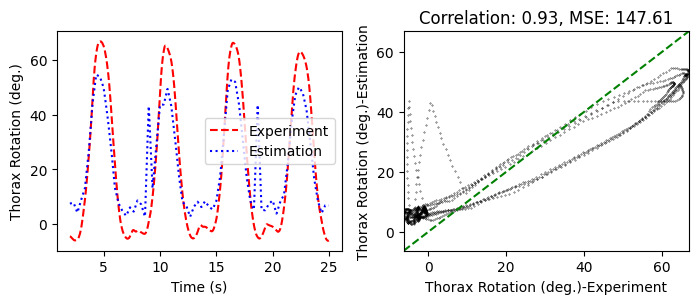

In [ ]:
# Plot data
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.metrics import mean_squared_error

# Set font to Arial and font size to 10
rcParams['font.family'] = 'sans-serif'
rcParams['font.size'] = 10

cm = 2.54
# Create the plot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18/cm, 8/cm))  # 8cm x 6cm = 3.15in x 2.36in

# Plot the data
ax[0].plot(sync_time, sync_theta_exp, '--r', label='Experiment')
ax[0].plot(sync_time, sync_theta_est, ':b', label='Estimation')

# Set the x and y labels
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Thorax Rotation (deg.)')

# Add the legend
ax[0].legend()


# - - - Correlation plot
ax[1].plot(sync_theta_exp, sync_theta_est, 'ok', alpha = 0.95, markersize=0.3)
# ax[1].set_xlabel('Thorax Rotation (deg.) - Experiment')

# Find the min and max values for x and y axes
min_val = min(min(sync_theta_exp), min(sync_theta_est))
max_val = max(max(sync_theta_exp), max(sync_theta_est))

# Add the unity line (y = x) to the plot
ax[1].plot([min_val, max_val], [min_val, max_val], '--g', label='Unity Line')

# Make ranges in x and y axes equal
ax[1].set_xlim([min_val, max_val])
ax[1].set_ylim([min_val, max_val])

# Calculate the correlation
correlation = np.corrcoef(sync_theta_exp, sync_theta_est)[0, 1]

# Calculate the mean squared error
mse = mean_squared_error(sync_theta_exp, sync_theta_est)

# Add the correlation and MSE to the title of the second plot
ax[1].set_title(f"Correlation: {correlation:.2f}, MSE: {mse:.2f}")

# Axis labels
ax[1].set_xlabel('Thorax Rotation (deg.)-Experiment')
ax[1].set_ylabel('Thorax Rotation (deg.)-Estimation')

# Display the plot
plt.tight_layout()
plt.show()